In [ ]:
library(Seurat)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(MetBrewer)
library(ggthemes)
library(ggpubr)

In [ ]:
# Read in the harmonized iGlut pre and post
seurat <- readRDS('seurat.rds')

In [ ]:
# Now calculate the comparison vs iglut_post
# Generate dataframe for %final_clustering in each AP-morphogens
# Use the seurat table function
df <- prop.table(table(seurat@meta.data$parse_id, seurat@meta.data$final_clustering), margin=1)

# Take cutoff for cluster counting (present in >= 2.5% of the sample)
threshold = 0.01
cut_df <- apply(df, c(1, 2), function(x) ifelse(x > threshold, 1, 0))

# Calculate number of clusters in each sample
cut_df_count <- cbind(count=rowSums(cut_df),cut_df)

# Add rownames of df as the first column (Sample)
df_info <- cbind(Sample = rownames(df), cut_df_count)

# Change the format to tibble
tb <- as_tibble(df_info)

# Combine morphogen information and proportion of annotations in each sample
final_df <- inner_join(sample_info, tb)
final_df <- final_df[,c(1,2,3,4,5)]
final_df$count <- as.numeric(final_df$count)
                

Joining with `by = join_by(Sample)`


Sample,AP_axis,DV_axis,Basal_media,count
<chr>,<chr>,<chr>,<chr>,<dbl>
p1_A1,XAV_3,BMP4_3,mTeSR,23
p1_A2,XAV_2,BMP4_3,mTeSR,20
p1_A3,XAV_1,BMP4_3,mTeSR,18
p1_A4,ctrl,BMP4_3,mTeSR,17
p1_A5,CHIR_1,BMP4_3,mTeSR,22
p1_A6,CHIR_2,BMP4_3,mTeSR,22


In [51]:
col_basal_media <- c('#cccccc','#4c825d','#8dc7dc','#0e2a4d')

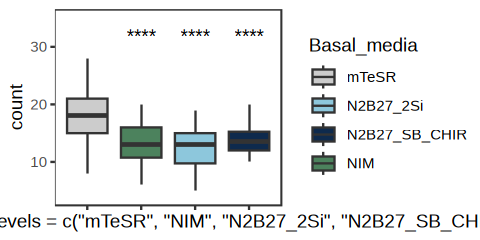

In [61]:
options(repr.plot.width=4, repr.plot.height=2)
ggplot(final_df, aes(x = factor(Basal_media, levels=c('mTeSR','NIM','N2B27_2Si','N2B27_SB_CHIR')), 
                     y = count, fill=Basal_media)) +
    geom_boxplot(outlier.size = 0.3) +
    theme_bw() +
    #facet_wrap(~ division, ncol=13) +
    ggpubr::rotate_x_text() +
    scale_fill_manual(values = col_basal_media) +
    theme(axis.text.x=element_blank()) +
    theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        strip.background = element_blank()) +
    stat_compare_means(label = "p.signif", method = "wilcox.test", 
                     ref.group = "mTeSR", label.y = max(final_df$count)*1.1) +
    ylim(4, 35)

# Save the plot to a file (e.g., PNG format)
dir <- '/home/hsiulin/scRNA_seq_analysis/Patterning_iN_final/Plot/Boxplot/iGlut_pre_post_comp_new/purity_compare.pdf'
ggsave(dir, width = 9, height = 5, dpi = 300, units = "cm")
